In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

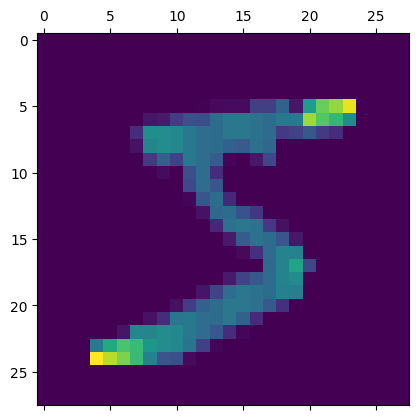

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

X_test_flatten = X_test.reshape(len(X_test), 28*28)


In [12]:
# model = keras.Sequential([
#     keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [13]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
#     keras.layers.Dense(10, activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [14]:
# model = keras.Sequential([
#     keras.layers.Dense(784, input_shape = (784,), activation = 'relu'),
#     keras.layers.Dense(10, activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.9082
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1553 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0639 - accuracy: 0.9812


In [16]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9731


[0.09553222358226776, 0.9731000065803528]

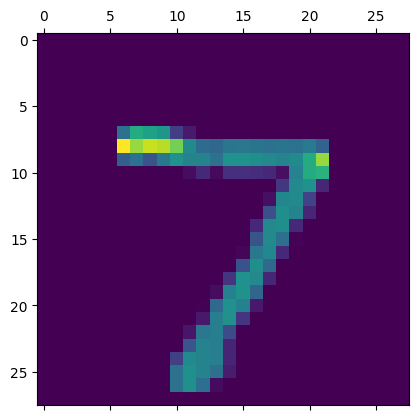

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_predicted[0]

array([8.6863972e-03, 1.3197799e-03, 7.1115583e-01, 9.8865837e-01,
       6.5601648e-06, 1.1196325e-03, 7.8390073e-08, 9.9993330e-01,
       1.7566480e-02, 2.6258340e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    0,    1,    3,    1,    2,    2],
       [   0, 1098,    5,    2,    0,    0,    3,    1,   26,    0],
       [   4,    0, 1004,    8,    1,    0,    3,    5,    7,    0],
       [   0,    0,    4,  991,    0,    5,    0,    2,    5,    3],
       [   0,    0,    7,    0,  956,    0,    4,    1,    3,   11],
       [   2,    0,    1,   12,    0,  866,    4,    0,    5,    2],
       [   8,    2,    1,    1,    2,    2,  938,    0,    4,    0],
       [   2,    3,   12,    9,    2,    1,    0,  990,    2,    7],
       [   4,    0,    4,    4,    5,    2,    3,    4,  945,    3],
       [   2,    4,    0,    7,   12,    5,    1,    1,    3,  974]])>

Text(95.72222222222221, 0.5, 'truth')

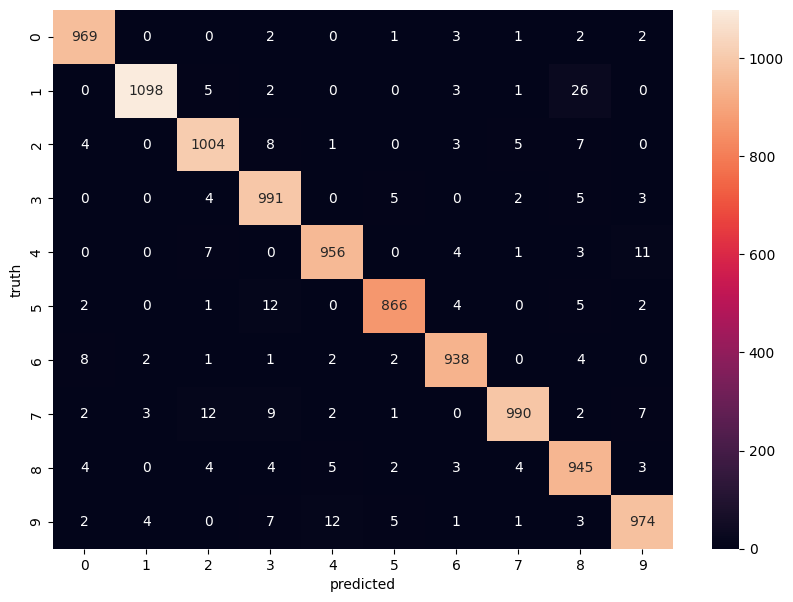

In [25]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')